In [12]:
original_text = """
Today is our dragon boat festival, in our Chinese culture, to celebrate it with all safe and great in our lives. Hope you too, to enjoy it as my deepest wishes.
Thank your message to show our words to the doctor, as his next contract checking, to all of us.
I got this message to see the approved message. In fact, I have received the message from the professor, to show me, this, a couple of days ago. I am very appreciated the full support of the professor, for our Springer proceedings publication
"""

reconstructed_pegasus = """
Today is the dragon boat festival in China and we want to celebrate it with joy.I hope you enjoy it as much as I did.
Thank you for the message, it will show our words to the doctor.
After getting this message, I saw the approved one.The professor sent a message to me a few days ago.The Springer proceedings were supported by the professor.
"""

reconstructed_bart = """
Today is our dragon boat festival, in our Chinese culture, to celebrate it with all safe and great inour lives.Hope you too, to enjoy it as my deepest wishes.
Thank your message to show our words to the doctor, as his next contract check, to all of us. Thank you.
I got this message to see the approved message.In fact, I have received the message from the ex-professor, to show me, this, a couple of days ago.I am very appreciated the full support of the board of directors, including the co-professor, for our Springer proceedings.
"""

reconstructed_t5 = """
dragon boat festival. In our Chinese culture, today is our dragon boat festival, in our dragon boat festival. In our Chinese culture, today is our dragon boat festival. In our Chinese culture, today is our dragon boat festival. In our dragon boat festival. In our dragon boat festival.too. Hope you too, to enjoy it. Hope you too, to enjoy it. it. Hope you too, to enjoy it. Hope you too, to enjoy it. Hope you too, to enjoy it. Hope you too, to enjoy it. Hope you too, toour words to show our words to show our words to show our words to show our words to show our words to show our words to show our words to show our words to show our words to show our words to show our words to show our words to show our words to show our words. I got this message to see the approved message.. I got this message to see the approved message.. I got this message to see the approved message... I got this message to see the approved message.. I got this message to see the approved message... I have received the message, from the professor, about this, a few days ago. In fact, I have received the message, from the professor, about this, a few days ago. In fact, I have received the message, from the professor, about thisthe full support. , for the full support. Thank you. , for the full support. Thank you. , thank you. , thank you. , thank you. , thank you. , thank you. , thank you. """

chatgpt_text = """
Today is our Dragon Boat Festival. In our Chinese culture, we celebrate it to wish for safety and greatness in our lives. I hope you can enjoy it too — this is my deepest wish.
Thank you for your message and for showing our words to the doctor, regarding his next contract review, on behalf of all of us.
I received the approved message. In fact, the professor had already sent it to me a couple of days ago. I truly appreciate the professor's full support for our Springer proceedings publication.
"""


In [2]:
import textstat

# Text readability report
def get_text_quality_report(text):
    return {
        "Flesch Reading Ease": textstat.flesch_reading_ease(text),
        "Flesch-Kincaid Grade": textstat.flesch_kincaid_grade(text),
        "Gunning Fog Index": textstat.gunning_fog(text),
        "SMOG Index": textstat.smog_index(text),
        "Automated Readability Index": textstat.automated_readability_index(text),
        "Dale-Chall Score": textstat.dale_chall_readability_score(text),
        "Difficult Words": textstat.difficult_words(text),
        "Lexicon Count": textstat.lexicon_count(text),
        "Sentence Count": textstat.sentence_count(text)
    }

In [3]:
texts = {
    "Original": original_text,
    "Reconstructed Pegasus": reconstructed_pegasus,
    "Reconstructed Bart": reconstructed_bart,
    "Reconstructed T5": reconstructed_t5,
    "ChatGPT": chatgpt_text
}

for name, text in texts.items():
    print(f"\n==== {name} ====")
    report = get_text_quality_report(text)
    for metric, value in report.items():
        print(f"{metric}: {value}")


==== Original ====
Flesch Reading Ease: 67.38637096774197
Flesch-Kincaid Grade: 7.710913978494627
Gunning Fog Index: 9.210752688172043
SMOG Index: 9.2995712137729
Automated Readability Index: 6.98322580645161
Dale-Chall Score: 7.970783870967742
Difficult Words: 18
Lexicon Count: 93
Sentence Count: 6

==== Reconstructed Pegasus ====
Flesch Reading Ease: 78.36145833333336
Flesch-Kincaid Grade: 4.979375000000001
Gunning Fog Index: 8.016666666666666
SMOG Index: 8.841846274778883
Automated Readability Index: 4.362395833333331
Dale-Chall Score: 7.619629166666667
Difficult Words: 8
Lexicon Count: 64
Sentence Count: 6

==== Reconstructed Bart ====
Flesch Reading Ease: 66.98100877192984
Flesch-Kincaid Grade: 7.850263157894741
Gunning Fog Index: 9.701754385964913
SMOG Index: 9.725611199111238
Automated Readability Index: 8.25182456140351
Dale-Chall Score: 8.577096491228069
Difficult Words: 21
Lexicon Count: 95
Sentence Count: 6

==== Reconstructed T5 ====
Flesch Reading Ease: 79.4476884337754
F

In [4]:
from sentence_transformers import SentenceTransformer

# Bert
bert_model = SentenceTransformer('all-MiniLM-L6-v2')

emb_original = bert_model.encode(original_text)
emb_pegasus = bert_model.encode(reconstructed_pegasus)
emb_bart = bert_model.encode(reconstructed_bart)
emb_t5 = bert_model.encode(reconstructed_t5)
emb_chatgpt = bert_model.encode(chatgpt_text)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [34]:
from sklearn.metrics.pairwise import cosine_similarity

# Cosine similarity
def cosine_sim(v1, v2):
    return cosine_similarity([v1], [v2])[0][0]

In [33]:
# BERT Cosine Similarity
print("Similarity Original vs Pegasus: ", cosine_sim(emb_original, emb_pegasus))
print("Similarity Original vs Bart: ", cosine_sim(emb_original, emb_bart))
print("Similarity Original vs T5: ", cosine_sim(emb_original, emb_t5))
print("Similarity Original vs ChatGPT: ", cosine_sim(emb_original, emb_chatgpt))

Similarity Original vs Pegasus:  0.93753594
Similarity Original vs Bart:  0.97796804
Similarity Original vs T5:  0.7066157
Similarity Original vs ChatGPT:  0.9658408


In [28]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def show_pca(embeddings, labels):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(embeddings)

    plt.figure(figsize=(8,6))
    for point, label in zip(reduced, labels):
        plt.scatter(point[0], point[1], label=label)
        plt.text(point[0]+0.01, point[1]+0.01, label)

    plt.title("PCA of Sentence Embeddings")
    plt.legend()
    plt.show()

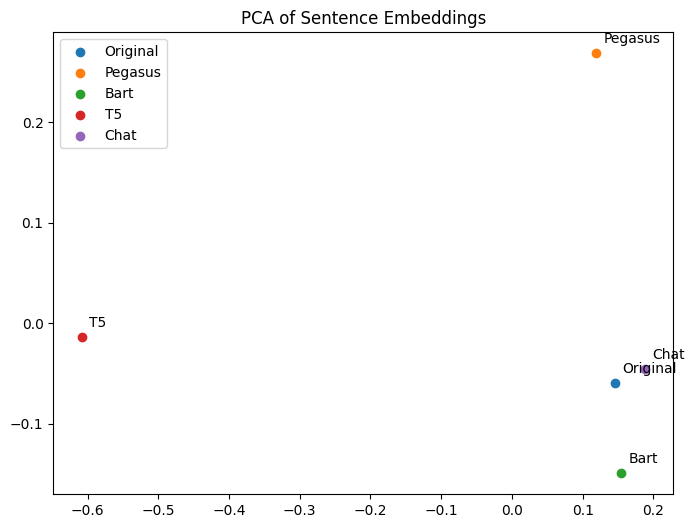

In [30]:
# BERT PCA
embeddings_bert = [emb_original, emb_pegasus, emb_bart, emb_t5, emb_chatgpt]
labels = ['Original', 'Pegasus', 'Bart', 'T5', 'Chat']

show_pca(embeddings_bert, labels)

In [9]:
import gensim.downloader as api

# Glove
model = api.load("glove-twitter-25")

[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
import numpy as np
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

def sentence_embedding(text, model):
    tokens = nltk.word_tokenize(text.lower())
    vectors = [model[word] for word in tokens if word in model]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

In [37]:
original_vec = sentence_embedding(original_text, model)
pegasus_vec = sentence_embedding(reconstructed_pegasus, model)
bart_vec = sentence_embedding(reconstructed_bart, model)
t5_vec = sentence_embedding(reconstructed_t5, model)
chatgpt_vec = sentence_embedding(chatgpt_text, model)

In [38]:
# Glove Cosine Similarity
print("Similarity Original vs Pegasus:", cosine_sim(original_vec, pegasus_vec))
print("Similarity Original vs BART:", cosine_sim(original_vec, bart_vec))
print("Similarity Original vs T5:", cosine_sim(original_vec, t5_vec))
print("Similarity Original vs ChatGPT:", cosine_sim(original_vec, chatgpt_vec))

Similarity Original vs Pegasus: 0.9974544
Similarity Original vs BART: 0.999684
Similarity Original vs T5: 0.99760133
Similarity Original vs ChatGPT: 0.9983543


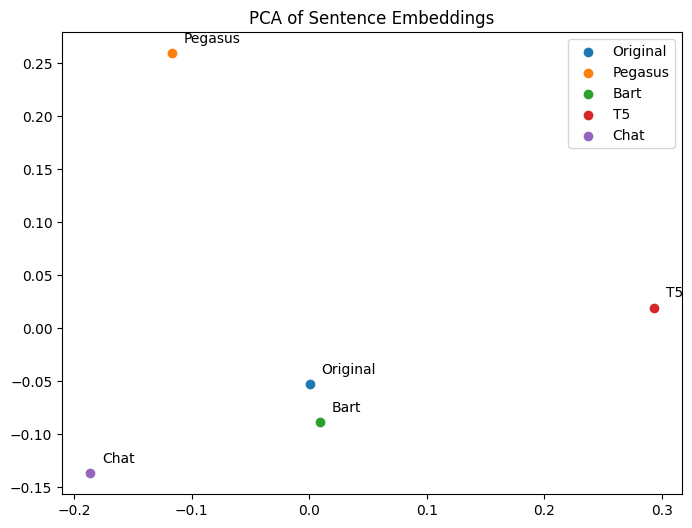

In [39]:
# Glove PCA
embeddings_glove = [original_vec, pegasus_vec, bart_vec, t5_vec, chatgpt_vec]
labels = ['Original', 'Pegasus', 'Bart', 'T5', 'Chat']

show_pca(embeddings_glove, labels)

In [ ]:
import re
import nltk
import numpy as np
from nltk.corpus import stopwords, wordnet as wn
from nltk.tokenize import word_tokenize
from gensim.downloader import load
from sklearn.metrics.pairwise import cosine_similarity
import spacy

In [43]:
stop_words = set(stopwords.words('english'))
nlp = spacy.load("en_core_web_sm")
embedding_model = load("glove-twitter-25")

In [44]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    return tokens

In [45]:
def embed_sentence(tokens):
    vectors = [embedding_model[t] for t in tokens if t in embedding_model]
    if not vectors:
        return np.zeros(embedding_model.vector_size)
    return np.mean(vectors, axis=0)

In [46]:
def build_vocab(texts):
    vocab = set()
    for t in texts:
        tokens = preprocess(t)
        vocab.update(tokens)
    return vocab

In [ ]:
# Can be used to show semantic tree structure of words
def print_wordnet_info(word):
    synsets = wn.synsets(word)
    for s in synsets[:3]:  # Show first 3 senses
        print(f"WordNet: {s.name()} → {s.definition()}")

def print_dependencies(text):
    doc = nlp(text)
    for token in doc:
        print(f"{token.text} → {token.dep_} → {token.head.text}")
        
# For example, to print dependencies of the original text
print("Dependencies of Original Text:")
print_dependencies(original_text)

In [48]:
def custom_pipeline(text):
    tokens = preprocess(text)
    embedding = embed_sentence(tokens)
    print(f"Tokens:", tokens[:10])
    print(f"Embedding (sample):", embedding[:5])
    return embedding

In [49]:
original_vec = custom_pipeline(original_text)
pegasus_vec = custom_pipeline(reconstructed_pegasus)
bart_vec = custom_pipeline(reconstructed_bart)
t5_vec = custom_pipeline(reconstructed_t5)
chatgpt_vec = custom_pipeline(chatgpt_text)

Tokens: ['today', 'dragon', 'boat', 'festival', 'chinese', 'culture', 'celebrate', 'safe', 'great', 'lives']
Embedding (sample): [-0.16422953  0.43594432  0.05779614 -0.07363709  0.06018784]
Tokens: ['today', 'dragon', 'boat', 'festival', 'china', 'want', 'celebrate', 'joyi', 'hope', 'enjoy']
Embedding (sample): [-0.16970314  0.35035947  0.19975786 -0.15793677 -0.09879918]
Tokens: ['today', 'dragon', 'boat', 'festival', 'chinese', 'culture', 'celebrate', 'safe', 'great', 'inour']
Embedding (sample): [-0.2388032   0.44876862 -0.01464709 -0.1712665   0.08064518]
Tokens: ['dragon', 'boat', 'festival', 'chinese', 'culture', 'today', 'dragon', 'boat', 'festival', 'dragon']
Embedding (sample): [-0.11059062  0.30572605  0.14892441  0.0025523  -0.00055919]
Tokens: ['today', 'dragon', 'boat', 'festival', 'chinese', 'culture', 'celebrate', 'wish', 'safety', 'greatness']
Embedding (sample): [-0.16944383  0.43409616 -0.0466942  -0.11265766  0.00716945]


In [50]:
print("Similarity Original vs Pegasus:", cosine_sim(original_vec, pegasus_vec))
print("Similarity Original vs BART:", cosine_sim(original_vec, bart_vec))
print("Similarity Original vs T5:", cosine_sim(original_vec, t5_vec))
print("Similarity Original vs ChatGPT:", cosine_sim(original_vec, chatgpt_vec))

Similarity Original vs Pegasus: 0.9936786
Similarity Original vs BART: 0.9973004
Similarity Original vs T5: 0.9904377
Similarity Original vs ChatGPT: 0.99562913


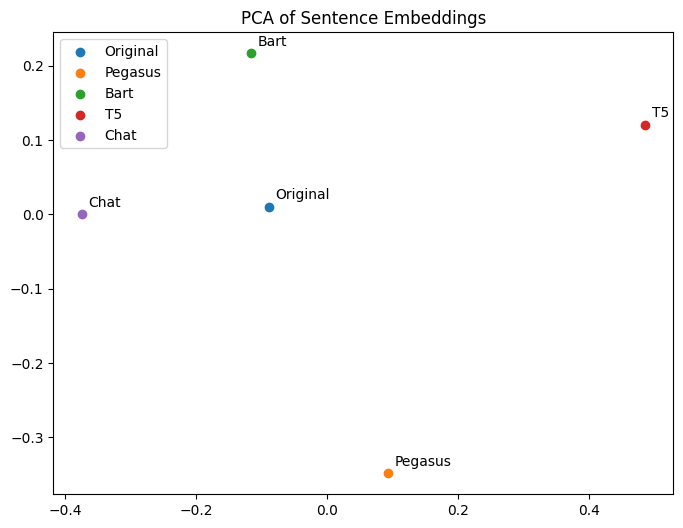

In [51]:
# Custom PCA
embeddings_custom = [original_vec, pegasus_vec, bart_vec, t5_vec, chatgpt_vec]
labels = ['Original', 'Pegasus', 'Bart', 'T5', 'Chat']

show_pca(embeddings_custom, labels)

In [63]:
# End results
original_bert = embeddings_bert[0]
original_glove = embeddings_glove[0]
original_custom = embeddings_custom[0]

names = ["Original", "Pegasus", "Bart", "T5", "ChatGPT"]

data = []

for i in range(1,len(embeddings_bert)):
    sim_bert = cosine_similarity([original_bert], [embeddings_bert[i]])[0][0]
    sim_glove = cosine_similarity([original_glove], [embeddings_glove[i]])[0][0]
    sim_custom = cosine_similarity([original_custom], [embeddings_custom[i]])[0][0]

    data.append([names[i], sim_bert, sim_glove, sim_custom])

In [64]:
import pandas as pd

df = pd.DataFrame(data, columns=[
    "Model",
    "Cosine BERT",
    "Cosine GloVe",
    "Cosine Custom",
])

# Display table
print(df.to_string(index=False))

  Model  Cosine BERT  Cosine GloVe  Cosine Custom
Pegasus     0.937536      0.997454       0.993679
   Bart     0.977968      0.999684       0.997300
     T5     0.706616      0.997601       0.990438
ChatGPT     0.965841      0.998354       0.995629
